In [1]:
import tensorflow as tf
# from tensorboard.plugins.hparams import api as hp
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [22]:
ratings = pd.read_pickle("./Data/small_random_selection_longform.pkl")


In [17]:
len(ratings)

555154

In [4]:
user_enc = LabelEncoder()
ratings['user'] = user_enc.fit_transform(ratings['user_id'].values)
n_users = ratings['user'].nunique()
n_users

37235

In [5]:
item_enc = LabelEncoder()
ratings['movie'] = item_enc.fit_transform(ratings['movie_id'].values)
n_movies = ratings['movie'].nunique()
n_movies

29758

In [6]:
nmovie_id = ratings.movie_id.nunique()
nuser_id = ratings.user_id.nunique()

In [7]:
X_train, X_test = train_test_split(ratings[['movie', 'user', 'rating_score']], test_size=0.3, random_state=42)

In [8]:
len(X_train)

388607

In [9]:
l2_1 = keras.regularizers.l2(.1)
l2_01 = 'l2'
l2_001 = keras.regularizers.l2(.001)

In [10]:
HP_NUM_UNITS = [128, 256]
HP_DROPOUT = [.4, .6]
HP_LEARNING_RATE = [.1]
HP_REGULARIZER = [l2_1]

In [11]:
def train_test_model(hparams):
    
    input_movies = keras.layers.Input(shape=[1])
    embed_movies = keras.layers.Embedding(nmovie_id+1, 15)(input_movies)
    movies_out = keras.layers.Flatten()(embed_movies)

    input_users = keras.layers.Input(shape=[1])
    embed_users = keras.layers.Embedding(nuser_id+1, 15)(input_users)
    users_out = keras.layers.Flatten()(embed_users)

    conc_layer = keras.layers.Concatenate()([movies_out, users_out])
    x = keras.layers.Dense(hparams['HP_NUM_UNITS'], 
                           activation='relu', 
                           kernel_regularizer=hparams['HP_REGULARIZER'])(conc_layer)
    dropout = x = keras.layers.Dropout(rate=hparams['HP_DROPOUT'], seed=42)(x)
    x_out = x = keras.layers.Dense(1, 
                                   activation='relu',
                                  kernel_regularizer=hparams['HP_REGULARIZER'])(x)

    model = keras.Model([input_movies, input_users], x_out)
    
    opt = tf.optimizers.Adam(learning_rate=hparams['HP_LEARNING_RATE'])
    model.compile(optimizer=opt, loss='mean_squared_error', metrics = keras.metrics.RootMeanSquaredError())
    
    hist = model.fit([X_train.movie, X_train.user], 
                 X_train.rating_score,  
                 batch_size=len(X_train), epochs=100, validation_split=.2)

#     print(hist.history['val_mean_squared_error'])
    return hist

In [12]:
run_history = {}

session_num = 0

for num_units in HP_NUM_UNITS:
    for dropout_rate in HP_DROPOUT:
        for learning_rate in HP_LEARNING_RATE:
            for regularization in HP_REGULARIZER:
                hparams = {
                'HP_NUM_UNITS': num_units,
                'HP_DROPOUT': dropout_rate,
                'HP_LEARNING_RATE': learning_rate,
                'HP_REGULARIZER': regularization,
                }
                
                run_name = "run-{}".format(session_num)
                print("----Starting trial: {}".format(run_name))
                print(hparams)
                
                output = train_test_model(hparams,)
                run_history[run_name] = {
                    'params': hparams,
                    'output': output,
                }
                session_num += 1

----Starting trial: run-0
{'HP_NUM_UNITS': 128, 'HP_DROPOUT': 0.4, 'HP_LEARNING_RATE': 0.1, 'HP_REGULARIZER': <tensorflow.python.keras.regularizers.L2 object at 0x7f5bfae10b80>}
Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 20.5590 - root_mean_squared_error: 3.9239 - val_loss: 8.5632 - val_root_mean_squared_error: 2.6608
Epoch 2/100
1/1 [==============================] - 1s 752ms/step - loss: 8.5904 - root_mean_squared_error: 2.6659 - val_loss: 10.9536 - val_root_mean_squared_error: 2.9747
Epoch 3/100
1/1 [==============================] - 1s 635ms/step - loss: 11.7251 - root_mean_squared_error: 3.1017 - val_loss: 4.4304 - val_root_mean_squared_error: 1.5809
Epoch 4/100
1/1 [==============================] - 1s 642ms/step - loss: 4.4990 - root_mean_squared_error: 1.6025 - val_loss: 5.7176 - val_root_mean_squared_error: 1.9481
Epoch 5/100
1/1 [==============================] - 1s 694ms/step - loss: 5.7874 - root_mean_squared_error: 1.9660 - val_loss: 3.6971 - val

Epoch 48/100
1/1 [==============================] - 1s 579ms/step - loss: 0.8105 - root_mean_squared_error: 0.8179 - val_loss: 0.9349 - val_root_mean_squared_error: 0.9033
Epoch 49/100
1/1 [==============================] - 1s 688ms/step - loss: 0.8030 - root_mean_squared_error: 0.8271 - val_loss: 0.9362 - val_root_mean_squared_error: 0.9060
Epoch 50/100
1/1 [==============================] - 1s 584ms/step - loss: 0.8047 - root_mean_squared_error: 0.8302 - val_loss: 0.9514 - val_root_mean_squared_error: 0.9055
Epoch 51/100
1/1 [==============================] - 1s 568ms/step - loss: 0.7913 - root_mean_squared_error: 0.8123 - val_loss: 0.9623 - val_root_mean_squared_error: 0.9106
Epoch 52/100
1/1 [==============================] - 1s 659ms/step - loss: 0.7943 - root_mean_squared_error: 0.8131 - val_loss: 0.9295 - val_root_mean_squared_error: 0.9025
Epoch 53/100
1/1 [==============================] - 1s 622ms/step - loss: 0.7830 - root_mean_squared_error: 0.8173 - val_loss: 0.9305 - val_

Epoch 96/100
1/1 [==============================] - 1s 545ms/step - loss: 0.7222 - root_mean_squared_error: 0.7910 - val_loss: 0.9107 - val_root_mean_squared_error: 0.9019
Epoch 97/100
1/1 [==============================] - 1s 638ms/step - loss: 0.7218 - root_mean_squared_error: 0.7903 - val_loss: 0.9061 - val_root_mean_squared_error: 0.9007
Epoch 98/100
1/1 [==============================] - 1s 608ms/step - loss: 0.7207 - root_mean_squared_error: 0.7911 - val_loss: 0.9073 - val_root_mean_squared_error: 0.9012
Epoch 99/100
1/1 [==============================] - 1s 607ms/step - loss: 0.7199 - root_mean_squared_error: 0.7904 - val_loss: 0.9100 - val_root_mean_squared_error: 0.9021
Epoch 100/100
1/1 [==============================] - 1s 583ms/step - loss: 0.7189 - root_mean_squared_error: 0.7891 - val_loss: 0.9050 - val_root_mean_squared_error: 0.9006
----Starting trial: run-1
{'HP_NUM_UNITS': 128, 'HP_DROPOUT': 0.6, 'HP_LEARNING_RATE': 0.1, 'HP_REGULARIZER': <tensorflow.python.keras.regu

Epoch 43/100
1/1 [==============================] - 1s 663ms/step - loss: 0.9175 - root_mean_squared_error: 0.8755 - val_loss: 0.9773 - val_root_mean_squared_error: 0.9101
Epoch 44/100
1/1 [==============================] - 1s 666ms/step - loss: 0.9262 - root_mean_squared_error: 0.8816 - val_loss: 0.9380 - val_root_mean_squared_error: 0.9017
Epoch 45/100
1/1 [==============================] - 1s 634ms/step - loss: 0.8929 - root_mean_squared_error: 0.8763 - val_loss: 0.9567 - val_root_mean_squared_error: 0.9183
Epoch 46/100
1/1 [==============================] - 1s 587ms/step - loss: 0.9162 - root_mean_squared_error: 0.8960 - val_loss: 0.9313 - val_root_mean_squared_error: 0.8991
Epoch 47/100
1/1 [==============================] - 1s 608ms/step - loss: 0.8753 - root_mean_squared_error: 0.8674 - val_loss: 0.9633 - val_root_mean_squared_error: 0.9100
Epoch 48/100
1/1 [==============================] - 1s 602ms/step - loss: 0.9021 - root_mean_squared_error: 0.8757 - val_loss: 0.9345 - val_

Epoch 91/100
1/1 [==============================] - 1s 609ms/step - loss: 0.7784 - root_mean_squared_error: 0.8295 - val_loss: 0.8984 - val_root_mean_squared_error: 0.8986
Epoch 92/100
1/1 [==============================] - 1s 657ms/step - loss: 0.7773 - root_mean_squared_error: 0.8286 - val_loss: 0.9006 - val_root_mean_squared_error: 0.8993
Epoch 93/100
1/1 [==============================] - 1s 646ms/step - loss: 0.7760 - root_mean_squared_error: 0.8271 - val_loss: 0.8982 - val_root_mean_squared_error: 0.8988
Epoch 94/100
1/1 [==============================] - 1s 666ms/step - loss: 0.7743 - root_mean_squared_error: 0.8271 - val_loss: 0.8962 - val_root_mean_squared_error: 0.8986
Epoch 95/100
1/1 [==============================] - 1s 640ms/step - loss: 0.7742 - root_mean_squared_error: 0.8280 - val_loss: 0.8976 - val_root_mean_squared_error: 0.8989
Epoch 96/100
1/1 [==============================] - 1s 647ms/step - loss: 0.7727 - root_mean_squared_error: 0.8265 - val_loss: 0.8988 - val_

1/1 [==============================] - 1s 972ms/step - loss: 1.0306 - root_mean_squared_error: 0.8219 - val_loss: 1.2377 - val_root_mean_squared_error: 0.9688
Epoch 39/100
1/1 [==============================] - 1s 936ms/step - loss: 1.0666 - root_mean_squared_error: 0.8760 - val_loss: 1.1464 - val_root_mean_squared_error: 0.9210
Epoch 40/100
1/1 [==============================] - 1s 909ms/step - loss: 0.9567 - root_mean_squared_error: 0.8115 - val_loss: 1.2289 - val_root_mean_squared_error: 0.9573
Epoch 41/100
1/1 [==============================] - 1s 971ms/step - loss: 1.0248 - root_mean_squared_error: 0.8440 - val_loss: 1.1343 - val_root_mean_squared_error: 0.9275
Epoch 42/100
1/1 [==============================] - 1s 949ms/step - loss: 0.9453 - root_mean_squared_error: 0.8193 - val_loss: 1.1497 - val_root_mean_squared_error: 0.9451
Epoch 43/100
1/1 [==============================] - 1s 931ms/step - loss: 0.9636 - root_mean_squared_error: 0.8409 - val_loss: 1.1352 - val_root_mean_squ

Epoch 32/100
1/1 [==============================] - 1s 973ms/step - loss: 2.6717 - root_mean_squared_error: 1.3259 - val_loss: 1.9288 - val_root_mean_squared_error: 0.9811
Epoch 33/100
1/1 [==============================] - 1s 910ms/step - loss: 1.8466 - root_mean_squared_error: 0.9383 - val_loss: 2.3622 - val_root_mean_squared_error: 1.1739
Epoch 34/100
1/1 [==============================] - 1s 931ms/step - loss: 2.3810 - root_mean_squared_error: 1.1819 - val_loss: 1.9318 - val_root_mean_squared_error: 1.0669
Epoch 35/100
1/1 [==============================] - 1s 852ms/step - loss: 1.8072 - root_mean_squared_error: 1.0068 - val_loss: 2.1773 - val_root_mean_squared_error: 1.2078
Epoch 36/100
1/1 [==============================] - 1s 917ms/step - loss: 2.0274 - root_mean_squared_error: 1.1441 - val_loss: 1.8339 - val_root_mean_squared_error: 1.0206
Epoch 37/100
1/1 [==============================] - 1s 957ms/step - loss: 1.7669 - root_mean_squared_error: 0.9873 - val_loss: 1.8499 - val_

Epoch 80/100
1/1 [==============================] - 1s 898ms/step - loss: 0.9637 - root_mean_squared_error: 0.8503 - val_loss: 1.0928 - val_root_mean_squared_error: 0.9285
Epoch 81/100
1/1 [==============================] - 1s 912ms/step - loss: 0.9534 - root_mean_squared_error: 0.8501 - val_loss: 1.0959 - val_root_mean_squared_error: 0.9336
Epoch 82/100
1/1 [==============================] - 1s 920ms/step - loss: 0.9524 - root_mean_squared_error: 0.8533 - val_loss: 1.0877 - val_root_mean_squared_error: 0.9253
Epoch 83/100
1/1 [==============================] - 1s 929ms/step - loss: 0.9522 - root_mean_squared_error: 0.8489 - val_loss: 1.0855 - val_root_mean_squared_error: 0.9291
Epoch 84/100
1/1 [==============================] - 1s 943ms/step - loss: 0.9433 - root_mean_squared_error: 0.8491 - val_loss: 1.0857 - val_root_mean_squared_error: 0.9312
Epoch 85/100
1/1 [==============================] - 1s 934ms/step - loss: 0.9429 - root_mean_squared_error: 0.8510 - val_loss: 1.0796 - val_

In [13]:
import matplotlib.pyplot as plt

In [14]:
len(run_history.keys())

4

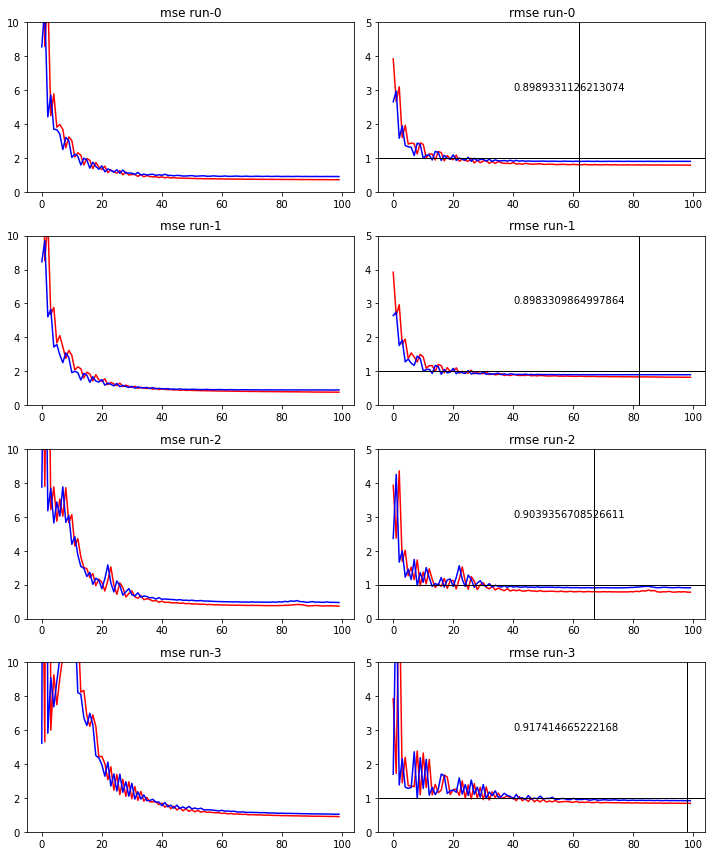

In [15]:
fig, axs = plt.subplots(ncols=2, nrows=len(run_history.keys()), figsize=(10, len(run_history.keys())*3))

for n, key in enumerate(run_history.keys()):
    axs[n,0].plot(run_history[key]['output'].history['loss'], color='r')
    axs[n,0].plot(run_history[key]['output'].history['val_loss'], color='b')
    
    axs[n,1].plot(run_history[key]['output'].history['root_mean_squared_error'], color='r')
    axs[n,1].plot(run_history[key]['output'].history['val_root_mean_squared_error'], color='b')
    axs[n,1].axvline(np.where(run_history[key]['output'].history['val_root_mean_squared_error']==np.min(run_history[key]['output'].history['val_root_mean_squared_error'])), 
                     color='k', lw=1)
    axs[n,1].annotate(str(np.min(run_history[key]['output'].history['val_root_mean_squared_error'])),
                        xy=(40,3),)
    
#     title_str = '-'.join(str(run_history[key]['params'][param]) for param in run_history[key]['params'].keys(),
#                         xytext=(.8,.8), xycoords='subfigure fraction')
    
    axs[n,0].set_title("mse {}".format(key))
    axs[n,1].set_title("rmse {}".format(key))
    
    axs[n,0].set_ylim(0,10)
    axs[n,1].set_ylim(0,5)
    
    axs[n, 1].axhline(1, color='k', lw=1)
    
plt.tight_layout()   
plt.show()

In [16]:
print(run_history['run-0'])
print(run_history['run-1'])
print(run_history['run-2'])
print(run_history['run-3'])

{'params': {'HP_NUM_UNITS': 128, 'HP_DROPOUT': 0.4, 'HP_LEARNING_RATE': 0.1, 'HP_REGULARIZER': <tensorflow.python.keras.regularizers.L2 object at 0x7f5bfae10b80>}, 'output': <tensorflow.python.keras.callbacks.History object at 0x7f5c444a8460>}
{'params': {'HP_NUM_UNITS': 128, 'HP_DROPOUT': 0.6, 'HP_LEARNING_RATE': 0.1, 'HP_REGULARIZER': <tensorflow.python.keras.regularizers.L2 object at 0x7f5bfae10b80>}, 'output': <tensorflow.python.keras.callbacks.History object at 0x7f5bf0044f40>}
{'params': {'HP_NUM_UNITS': 256, 'HP_DROPOUT': 0.4, 'HP_LEARNING_RATE': 0.1, 'HP_REGULARIZER': <tensorflow.python.keras.regularizers.L2 object at 0x7f5bfae10b80>}, 'output': <tensorflow.python.keras.callbacks.History object at 0x7f5be86ab730>}
{'params': {'HP_NUM_UNITS': 256, 'HP_DROPOUT': 0.6, 'HP_LEARNING_RATE': 0.1, 'HP_REGULARIZER': <tensorflow.python.keras.regularizers.L2 object at 0x7f5bfae10b80>}, 'output': <tensorflow.python.keras.callbacks.History object at 0x7f5be8472880>}


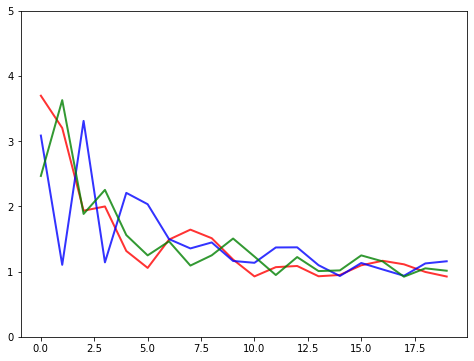

In [23]:
fig, ax = plt.subplots(figsize=(8,6))

colors = ['red', 'blue', 'green']
for n, key in enumerate(['run-0', 'run-3', 'run-6']):
    
    ax.plot(run_history[key]['output'].history['val_root_mean_squared_error'], color=colors[n], alpha=.8, lw=2)

ax.set_ylim(0,5)
plt.show()

{'params': {'HP_NUM_UNITS': 64,
  'HP_DROPOUT': 0.3,
  'HP_LEARNING_RATE': 0.1,
  'HP_REGULARIZER': <tensorflow.python.keras.regularizers.L2 at 0x7fc3be6db070>},
 'output': <tensorflow.python.keras.callbacks.History at 0x7fc3902b80d0>}

In [26]:
run_history['run-0']['params']['HP_REGULARIZER'].l2

array(0.1, dtype=float32)

In [27]:
run_history['run-1']

{'params': {'HP_NUM_UNITS': 64,
  'HP_DROPOUT': 0.3,
  'HP_LEARNING_RATE': 0.01,
  'HP_REGULARIZER': 'l2'},
 'output': <tensorflow.python.keras.callbacks.History at 0x7f4efc4fe4f0>}

In [21]:
len(run_history['run-1']['output']['loss'])

100

In [19]:
import json
def export_history(run_history, batch_size, n_epochs, save_path):
    history_dict = run_history.copy()
    for key in history_dict:
        if history_dict[key]['params']['HP_REGULARIZER']=='l2':
            
            history_dict[key]['params']['HP_REGULARIZER'] = .01
        else:
            try:
                history_dict[key]['params']['HP_REGULARIZER'] = history_dict[key]['params']['HP_REGULARIZER'].l2.tolist()
            except:
                pass   
        if type(history_dict[key]['params']['HP_REGULARIZER']) == np.ndarray:
            history_dict[key]['params']['HP_REGULARIZER'] = history_dict[key]['params']['HP_REGULARIZER'].tolist()
        history_dict[key]['params']['batch_size'] = batch_size
        history_dict[key]['params']['n_epochs'] = n_epochs
        
        try:
            history_dict[key]['output'] = history_dict[key]['output'].history
        except:
            history_dict[key]['output'] = history_dict[key]['output']
      
    with open(save_path, 'w') as f:
        json.dump(history_dict, f)
    
    return history_dict

new_dict = export_history(run_history, len(X_train), 100, "./run_history/model9.json")